# Load dataset

In [1]:
import tools

edges, nodes, poss_set, neg_set = tools.sample_bipartite(
    '../datasets/bipartite/crime/train.in', 
    N=5,
    sparse=True)

Iteration 0, sampled edges 16
Iteration 1, sampled edges 36
Iteration 2, sampled edges 43
Iteration 3, sampled edges 50
Iteration 4, sampled edges 53
Iteration 5, sampled edges 58
Iteration 6, sampled edges 58
Iteration 7, sampled edges 60
Iteration 8, sampled edges 60
Iteration 9, sampled edges 62
Iteration 10, sampled edges 63
Iteration 11, sampled edges 64
Iteration 12, sampled edges 64
Iteration 13, sampled edges 64
Iteration 14, sampled edges 65
Iteration 15, sampled edges 65
Iteration 16, sampled edges 66
Iteration 17, sampled edges 67
Iteration 18, sampled edges 67
Iteration 19, sampled edges 67
Iteration 20, sampled edges 67
Iteration 21, sampled edges 67
Iteration 22, sampled edges 67
Iteration 23, sampled edges 68


In [2]:
len(edges), len(poss_set), len(neg_set)

(1377, 68, 68)

# Visualize network

In [3]:
%matplotlib inline

In [4]:
from graph_tool.all import *
g = Graph(directed=False)
g.add_vertex(max(nodes) + 1)

for edge in edges:
    u, w = map(int, edge.split())
    g.add_edge(g.vertex(u), g.vertex(w))

In [5]:
is_bi, part = graph_tool.topology.is_bipartite(g, partition=True)
print(is_bi)

True


In [6]:
g_component = GraphView(g, vfilt=label_largest_component(g))

In [7]:
groups = g_component.new_vertex_property("int")

for u in g_component.vertices():
    groups[u] = part[u]

## SFDP

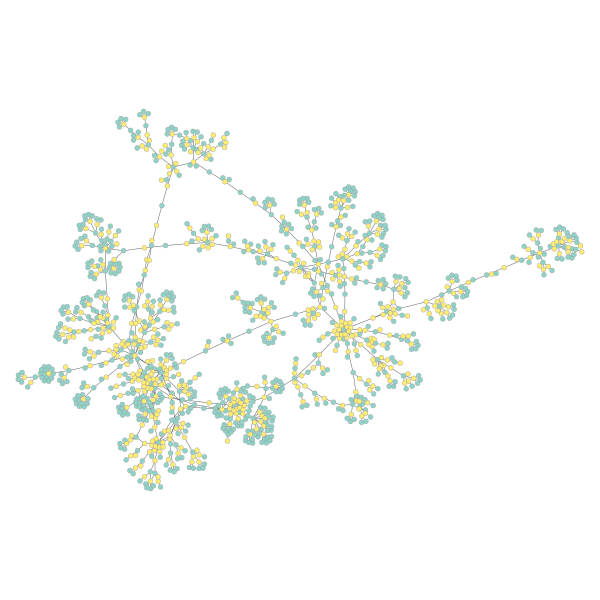

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f01ce6a78d0, at 0x7f01ce6afe90>

In [8]:
pos_default = sfdp_layout(g_component)
graph_draw(g_component, pos=pos_default, vertex_fill_color=groups)

## Bi-SFDP

** You have to install graph tool patch to successfully run the next cell.**

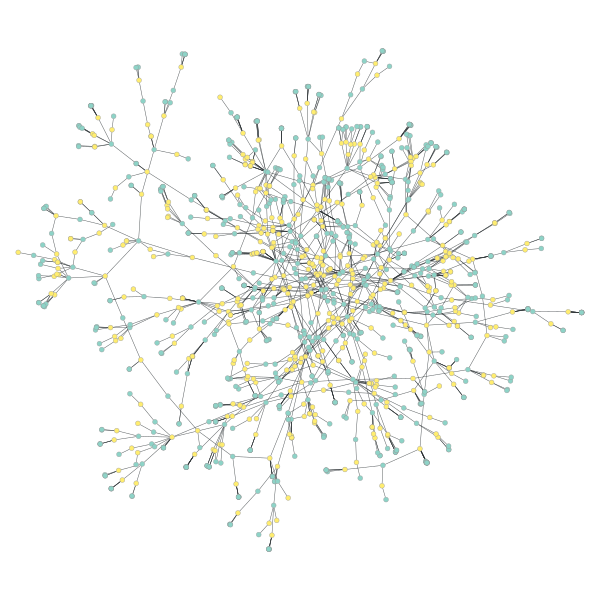

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f01ce6a78d0, at 0x7f01ce6a7e50>

In [9]:
pos_bip = sfdp_layout(g_component, groups=groups, bipartite=True, bipartite_method=["repulse-aliens", "repulse-aliens"])
graph_draw(g_component, pos=pos_bip, vertex_fill_color=groups)

# Scores

In [10]:
from sklearn.metrics import roc_auc_score

In [11]:
features = tools.TopologicalFeatures(g, pos_default)
X, Y = tools.make_dataset(poss_set, neg_set, 
                    [features.dist])
print "sfdp default: ", roc_auc_score(Y, X)

sfdp default:  0.998269896194


In [12]:
features = tools.TopologicalFeatures(g, pos_bip)
X, Y = tools.make_dataset(poss_set, neg_set, 
                    [features.dist])
print "bi-sfdp: ", roc_auc_score(Y, X)

bi-sfdp:  0.992647058824


In [13]:
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)

matrix = tools.make_sparse_matrix(edges, nodes, poss_set)

features = tools.MFFeatures(model, matrix)
X, Y = tools.make_dataset(poss_set, neg_set, 
                    [features.score])
roc_auc_score(Y, X)

0.81055363321799301

# Cross-validation

In [1]:
import cross_validation

cross_validation.cross_validation('../datasets/bipartite/crime/train.in', N=10, k=10, bipartite=True)

CN : 0.500000 (+/- 0.000000)
Adamic-Adar : 0.500000 (+/- 0.000000)
sfdp-bipartite : 0.334520 (+/- 0.067781)
NMF-100 : 0.538604 (+/- 0.022284)
PA : 0.295498 (+/- 0.046111)
svds-100 : 0.563045 (+/- 0.046012)
sfdp-default : 0.579487 (+/- 0.060241)
